In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv(r"placement.csv")
df.head()

,cgpa,resume_score,placed
0,8.14,6.52,1
1,6.17,5.17,0
2,8.27,8.86,1
3,6.88,7.27,1
4,7.52,7.30,1


In [9]:
df.isnull().sum() / len(df) * 100

cgpa            0.0
resume_score    0.0
placed          0.0
dtype: float64

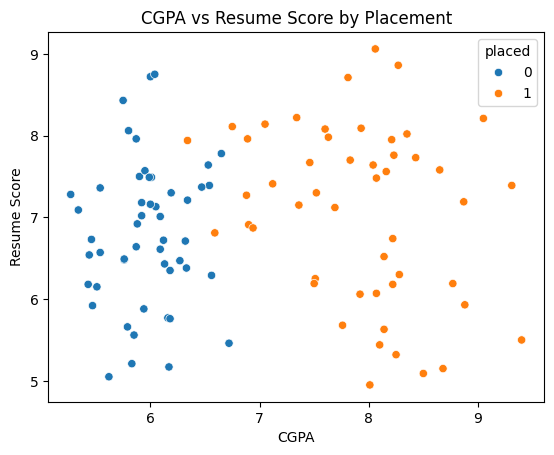

In [20]:
import seaborn as sns

sns.scatterplot(x=df['cgpa'], y=df['resume_score'], hue=df['placed']) 

# Optional: add titles and labels
plt.title('CGPA vs Resume Score by Placement')
plt.xlabel('CGPA')
plt.ylabel('Resume Score')
plt.show()

In [22]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [25]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [ ]:
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [28]:
pd.DataFrame({"y_test": y_test, "y_pred": y_pred})

,y_test,y_pred
83,1,1
53,0,0
70,1,1
45,1,1
44,0,0
39,1,1
22,0,0
80,1,1
10,0,0
0,1,1


In [ ]:
prob_logistic = model.predict_proba(X_test)
prob_positive  = prob_logistic[:, 1]
prob_values = (prob_positive > 0.5).astype(int)

results = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred,
    'Prob_Positive': prob_values
})

print(results)

    Actual  Predicted  Prob_Positive
83       1          1              1
53       0          0              0
70       1          1              1
45       1          1              1
44       0          0              0
39       1          1              1
22       0          0              0
80       1          1              1
10       0          0              0
0        1          1              1
18       0          0              0
30       1          1              1
73       0          0              0
33       1          1              1
90       0          0              0
4        1          1              1
76       1          1              1
77       0          0              0
12       0          0              0
31       0          0              0


In [43]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 1.0
Confusion Matrix:
 [[10  0]
 [ 0 10]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



d:\perceptron\venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


<Axes: >

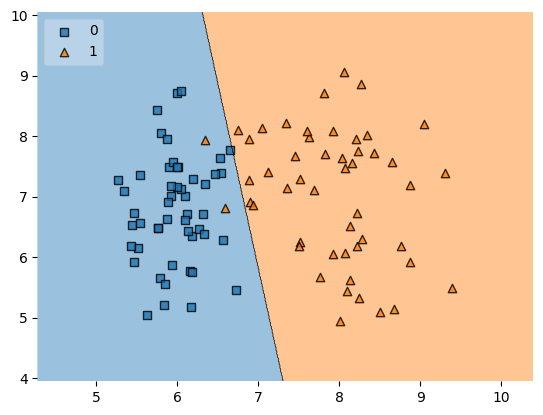

In [49]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X=X.values, y=y.values, clf=model, legend=2)

In [50]:

from sklearn.linear_model import Perceptron
p = Perceptron()

In [ ]:
p.fit(X,y)

print(f"bias:  {p.intercept_}")

print(f"qweights:  {p.coef_}")



bias:  [-25.]


array([[ 40.26, -36.  ]])